1) Mnist image generator.

In [3]:
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D,GlobalAveragePooling2D,Flatten

from keras.layers import BatchNormalization

from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Dense,Dropout,Activation

import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import random

from keras.callbacks import History

from tensorflow.keras.utils import to_categorical

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /= 255
x_test /= 255

print("Training matrix shape:",x_train.shape)
print("Testing matrix shape:",x_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
Training matrix shape: (60000, 28, 28, 1)
Testing matrix shape: (10000, 28, 28, 1)


In [5]:
nb_classes=10
y_train=to_categorical(y_train,nb_classes)
y_test=to_categorical(y_test,nb_classes)

In [6]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
convLayer01=Activation('relu')
model.add(convLayer01)

In [7]:
model.add(Conv2D(32,(3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convLayer02=MaxPooling2D(pool_size=(2,2))
model.add(convLayer02)

model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization(axis=-1))
convLayer03=Activation('relu')
model.add(convLayer03)

model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convLayer04=MaxPooling2D(pool_size=(2,2))
model.add(convLayer04)
model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
gen=ImageDataGenerator(rotation_range=8,width_shift_range=0.08,shear_range=0.3,height_shift_range=0.08,zoom_range=0.08)
test_gen=ImageDataGenerator()

In [11]:
train_generator=gen.flow(x_train,y_train,batch_size=128)
test_generator=test_gen.flow(x_test,y_test,batch_size=128)

In [12]:
history = History()

In [13]:
history=model.fit(train_generator,steps_per_epoch=60000//128,epochs=5,verbose=1,validation_data=test_generator,validation_steps=10000//128)

Epoch 1/5
468/468 [==============================] - 35s 46ms/step - loss: 0.1307 - accuracy: 0.9593 - val_loss: 0.3966 - val_accuracy: 0.8731
Epoch 2/5
468/468 [==============================] - 20s 43ms/step - loss: 0.0506 - accuracy: 0.9841 - val_loss: 0.0263 - val_accuracy: 0.9908
Epoch 3/5
468/468 [==============================] - 22s 46ms/step - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0948 - val_accuracy: 0.9711
Epoch 4/5
468/468 [==============================] - 21s 45ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0237 - val_accuracy: 0.9917
Epoch 5/5
468/468 [==============================] - 22s 46ms/step - loss: 0.0311 - accuracy: 0.9905 - val_loss: 0.0232 - val_accuracy: 0.9924


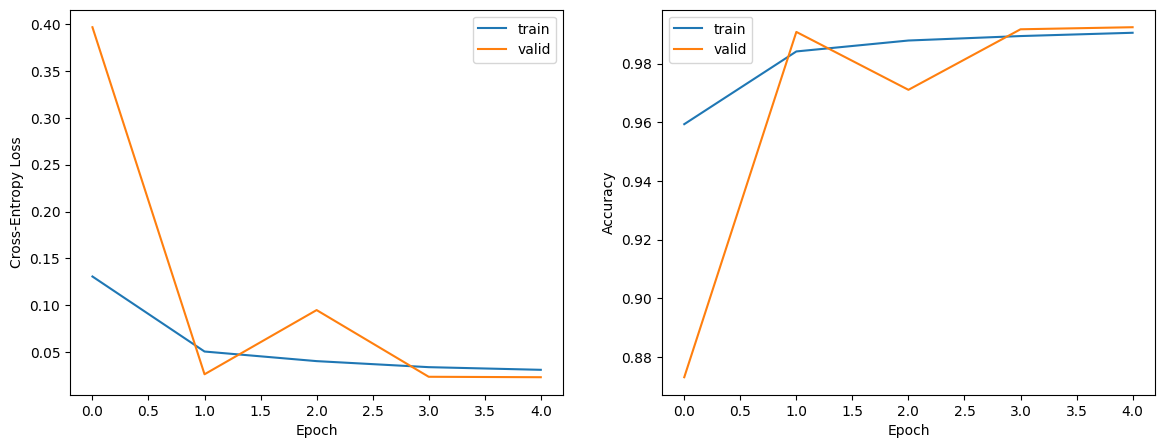

In [14]:
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

2) Cats and Dogs image classification using CNN.

In [15]:
#Loading Libraries
# Basic
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [16]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-12-03 10:42:33--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.25.248.114, 2600:1413:b000:793::317f, 2600:1413:b000:78a::317f
Connecting to download.microsoft.com (download.microsoft.com)|184.25.248.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   109MB/s    in 6.4s    

2023-12-03 10:42:40 (123 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [17]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from tensorflow import keras
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [19]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Dog/11246.jpg 1


In [20]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,PetImages/Cat/6432.jpg,0
1,PetImages/Cat/8995.jpg,0
2,PetImages/Dog/11319.jpg,1
3,PetImages/Cat/2186.jpg,0
4,PetImages/Dog/5722.jpg,1


In [21]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [22]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Dog/11702.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Cat/666.jpg']

In [23]:
# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

In [24]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [25]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

<Axes: ylabel='count'>

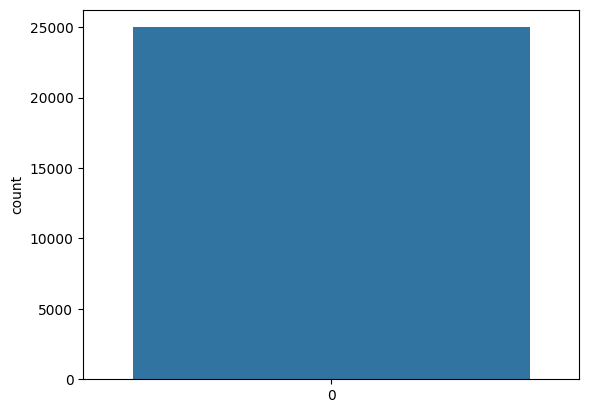

In [26]:
import seaborn as sns
sns.countplot(df['label'])

In [27]:
df['label'] = df['label'].astype('str')

In [28]:
df.head()

,images,label
0,PetImages/Cat/6432.jpg,0
1,PetImages/Cat/8995.jpg,0
2,PetImages/Dog/11319.jpg,1
3,PetImages/Cat/2186.jpg,0
4,PetImages/Dog/5722.jpg,1


In [29]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [30]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [31]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)       

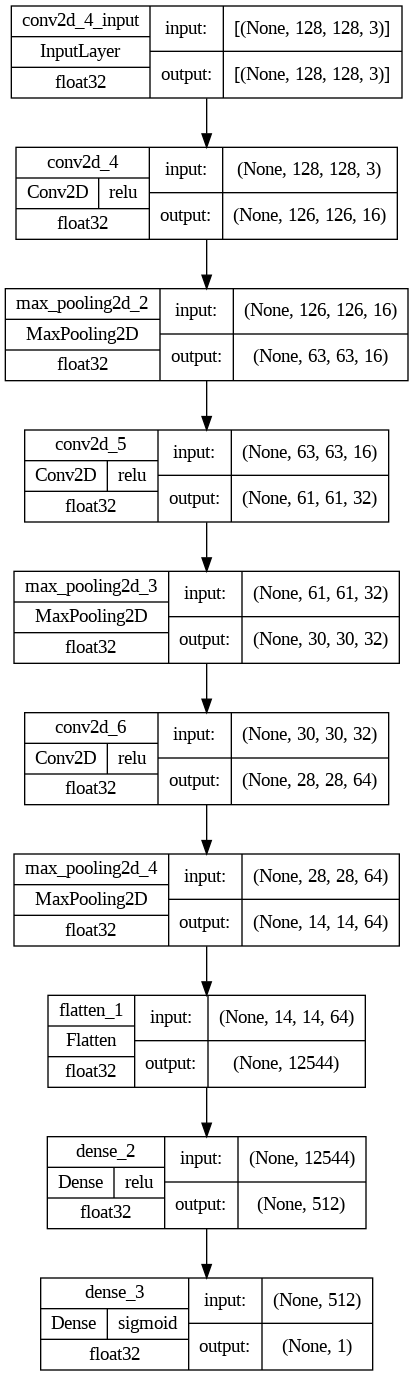

In [33]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)

In [34]:
history = model.fit(train_iterator, epochs=5, validation_data=val_iterator)

Epoch 1/5
40/40 [==============================] - 118s 3s/step - loss: 0.7239 - accuracy: 0.5416 - val_loss: 0.6672 - val_accuracy: 0.5514
Epoch 2/5
40/40 [==============================] - 115s 3s/step - loss: 0.6171 - accuracy: 0.6592 - val_loss: 0.6047 - val_accuracy: 0.6644
Epoch 3/5
40/40 [==============================] - 114s 3s/step - loss: 0.5805 - accuracy: 0.6949 - val_loss: 0.5354 - val_accuracy: 0.7328
Epoch 4/5
40/40 [==============================] - 115s 3s/step - loss: 0.5479 - accuracy: 0.7208 - val_loss: 0.5132 - val_accuracy: 0.7446
Epoch 5/5
40/40 [==============================] - 115s 3s/step - loss: 0.5395 - accuracy: 0.7286 - val_loss: 0.4880 - val_accuracy: 0.7656


acc= [0.5416041612625122, 0.6592159271240234, 0.6948694586753845, 0.7207720875740051, 0.7285728454589844]
val_acc= [0.5514000058174133, 0.6643999814987183, 0.7328000068664551, 0.7445999979972839, 0.7656000256538391]
loss= [0.7239305973052979, 0.6170793175697327, 0.5804955959320068, 0.5479084253311157, 0.5394577980041504]
val_loss= [0.6672348976135254, 0.6046595573425293, 0.5353853702545166, 0.5131837725639343, 0.48797476291656494]


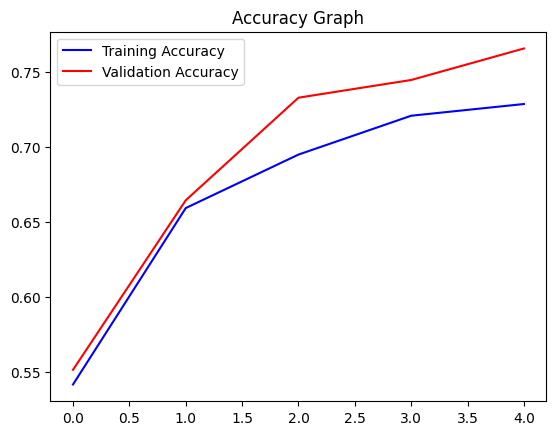

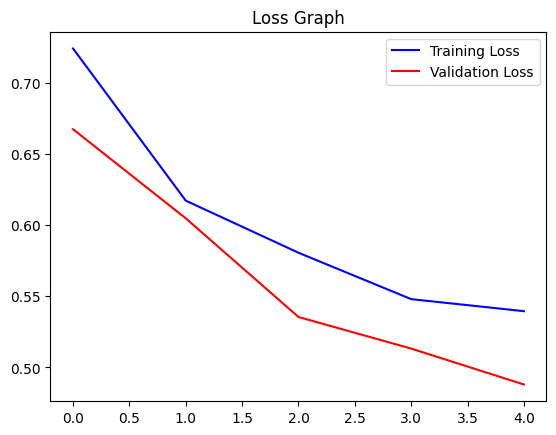

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print("acc=",acc)
print("val_acc=",val_acc)
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
print("loss=",loss)
val_loss = history.history['val_loss']
print("val_loss=",val_loss)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

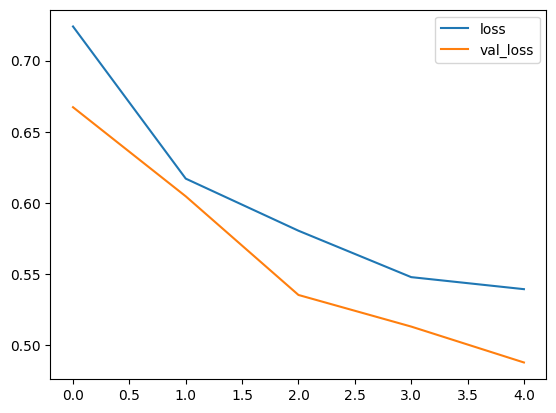

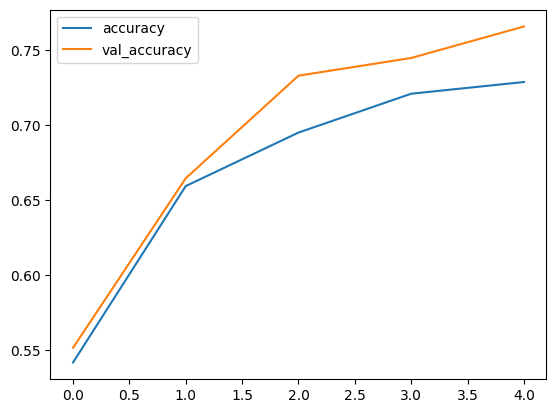

In [36]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


1/1 [==============================] - 0s 166ms/step
Cat


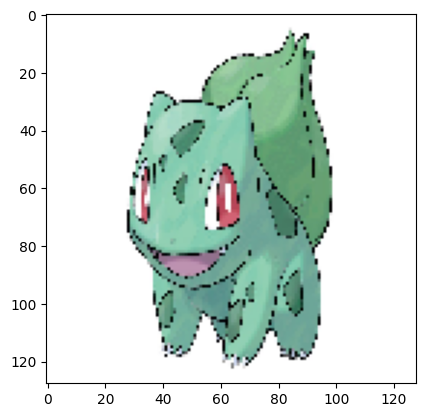

In [38]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('/content/poke.jpg',target_size=(128,128))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")


1/1 [==============================] - 0s 18ms/step
Cat


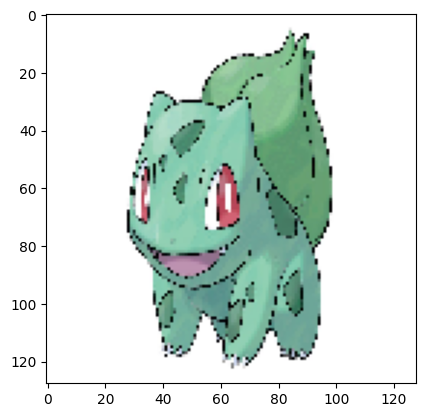

In [39]:
test_image = image.load_img('/content/poke.jpg', target_size=(128, 128))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
	print("Dog")
else:
	print("Cat")
